<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/segmentation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#segmentation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

import glob, os

In [6]:
!git clone https://github.com/kairess/human_segmentation

Cloning into 'human_segmentation'...
remote: Enumerating objects: 65, done.
remote: Total 65 (delta 0), reused 0 (delta 0), pack-reused 65
Unpacking objects: 100% (65/65), done.


In [9]:
!unzip -qq "/content/drive/MyDrive/datasets/LV-MHP-v1.zip"  #human parsing dataset

100%|██████████| 4000/4000 [21:54<00:00,  3.04it/s]


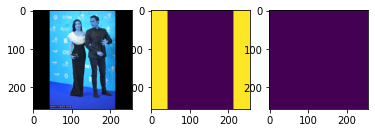

In [43]:
BASE_PATH = '/content/drive/MyDrive/datasets/LV-MHP-v1/images/'
IMG_WIDTH, IMG_HEIGHT = 256, 256
N_CLASSES = 2

with open('/content/drive/MyDrive/datasets/LV-MHP-v1/train_list.txt', 'r') as f:
    train_list = f.readlines()
    
x_train = np.zeros((len(train_list), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
y_train = np.zeros((len(train_list), IMG_HEIGHT, IMG_WIDTH, 2), dtype=np.uint8)
    
for i, train_path in enumerate(tqdm(train_list)):
    img_path = os.path.join(BASE_PATH, train_path.split(' ')[0])
    label_path = os.path.join(BASE_PATH, train_path.split(' ')[-1].strip())
    
    img = cv2.imread(img_path.strip(), cv2.IMREAD_COLOR)  #줄바꿈 삭제 위해 .strip() 필수
    label_img = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

    
    # result
    im = np.zeros((IMG_WIDTH, IMG_HEIGHT, 3), dtype=np.uint8)
    lim = np.zeros((IMG_WIDTH, IMG_HEIGHT), dtype=np.uint8)

    if img.shape[0] >= img.shape[1]:
        scale = img.shape[0] / IMG_HEIGHT
        new_width = int(img.shape[1] / scale)
        diff = (IMG_WIDTH - new_width) // 2
        img = cv2.resize(img, (new_width, IMG_HEIGHT))
        label_img = cv2.resize(label_img, (new_width, IMG_HEIGHT))

        im[:, diff:diff + new_width, :] = img
        lim[:, diff:diff + new_width] = label_img
    else:
        scale = img.shape[1] / IMG_WIDTH
        new_height = int(img.shape[0] / scale)
        diff = (IMG_HEIGHT - new_height) // 2
        img = cv2.resize(img, (IMG_WIDTH, new_height))
        label_img = cv2.resize(label_img, (IMG_WIDTH, new_height))
        im[diff:diff + new_height, :, :] = img
        lim[diff:diff + new_height, :] = label_img
        
    seg_labels = np.zeros((IMG_HEIGHT, IMG_WIDTH, N_CLASSES), dtype=np.uint8)
    for c in range(N_CLASSES):
        seg_labels[:, :, c] = (lim == c).astype(np.uint8)
    
    x_train[i] = im
    y_train[i] = seg_labels
    
plt.subplot(1, 3, 1)
plt.imshow(x_train[0])
plt.subplot(1, 3, 2)
plt.imshow(y_train[0,:,:,0])
plt.subplot(1, 3, 3)
plt.imshow(y_train[0,:,:,1])

In [45]:
np.savez_compressed('/content/drive/MyDrive/segmentation/data/x_train.npz', data=x_train)
np.savez_compressed('/content/drive/MyDrive/segmentation/data/y_train.npz', data=y_train)

In [58]:
f=open("/content/drive/MyDrive/segmentation/data/tiger_test.txt",'w')

for i in range(1,10):
  f.write("/content/drive/MyDrive/tiger-minhwa/TMP0000%d.png\n"%i)

for i in range(10,81):
  f.write("/content/drive/MyDrive/tiger-minhwa/TMP000%d.png\n"%i)

f.close()

100%|██████████| 80/80 [00:30<00:00,  2.65it/s]


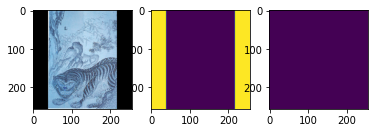

In [60]:
with open('/content/drive/MyDrive/segmentation/data/tiger_test.txt', 'r') as f:
    test_list = f.readlines()
    
x_val = np.zeros((len(test_list), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
y_val = np.zeros((len(test_list), IMG_HEIGHT, IMG_WIDTH, 2), dtype=np.uint8)
    
for i, test_path in enumerate(tqdm(test_list)):
    img_path = os.path.join(BASE_PATH, test_path.split(' ')[0])
    label_path = os.path.join(BASE_PATH, test_path.split(' ')[-1].strip())
    
    img = cv2.imread(img_path.strip(), cv2.IMREAD_COLOR)
    label_img = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    
    # result
    im = np.zeros((IMG_WIDTH, IMG_HEIGHT, 3), dtype=np.uint8)
    lim = np.zeros((IMG_WIDTH, IMG_HEIGHT), dtype=np.uint8)

    if img.shape[0] >= img.shape[1]:
        scale = img.shape[0] / IMG_HEIGHT
        new_width = int(img.shape[1] / scale)
        diff = (IMG_WIDTH - new_width) // 2
        img = cv2.resize(img, (new_width, IMG_HEIGHT))
        label_img = cv2.resize(label_img, (new_width, IMG_HEIGHT))

        im[:, diff:diff + new_width, :] = img
        lim[:, diff:diff + new_width] = label_img
    else:
        scale = img.shape[1] / IMG_WIDTH
        new_height = int(img.shape[0] / scale)
        diff = (IMG_HEIGHT - new_height) // 2
        img = cv2.resize(img, (IMG_WIDTH, new_height))
        label_img = cv2.resize(label_img, (IMG_WIDTH, new_height))
        im[diff:diff + new_height, :, :] = img
        lim[diff:diff + new_height, :] = label_img
        
    seg_labels = np.zeros((IMG_HEIGHT, IMG_WIDTH, N_CLASSES), dtype=np.uint8)
    for c in range(N_CLASSES):
        seg_labels[:, :, c] = (lim == c).astype(np.uint8)

    x_val[i] = im
    y_val[i] = seg_labels
    
plt.subplot(1, 3, 1)
plt.imshow(x_val[-1])
plt.subplot(1, 3, 2)
plt.imshow(y_val[-1,:,:,0])
plt.subplot(1, 3, 3)
plt.imshow(y_val[-1,:,:,1])

In [61]:
np.savez_compressed('/content/drive/MyDrive/segmentation/data/x_val.npz', data=x_val)
np.savez_compressed('/content/drive/MyDrive/segmentation/data/y_val.npz', data=y_val)

###test - 여백있는 256*256 img 생성

In [66]:
#img 경로 txt 파일 열기
with open('/content/drive/MyDrive/segmentation/data/tiger_test.txt', 'r') as f:
    train_list = f.readlines()
 
for i, train_path in enumerate(tqdm(train_list)):
    img_path = train_path.split(' ')[0]
        
    img = cv2.imread(img_path.strip(), cv2.IMREAD_COLOR)

    IMG_WIDTH, IMG_HEIGHT = 256, 256

    def preprocess(img):
        im = np.zeros((IMG_WIDTH, IMG_HEIGHT, 3), dtype=np.uint8)

        if img.shape[0] >= img.shape[1]:
            scale = img.shape[0] / IMG_HEIGHT
            new_width = int(img.shape[1] / scale)
            diff = (IMG_WIDTH - new_width) // 2
            img = cv2.resize(img, (new_width, IMG_HEIGHT))

            im[:, diff:diff + new_width, :] = img
        else:
            scale = img.shape[1] / IMG_WIDTH
            new_height = int(img.shape[0] / scale)
            diff = (IMG_HEIGHT - new_height) // 2
            img = cv2.resize(img, (IMG_WIDTH, new_height))

            im[diff:diff + new_height, :, :] = img
            
        return im

    img = preprocess(img)
    #저장
    cv2.imwrite("/content/drive/MyDrive/test/seg-tiger%d.png"%(i+1),img)



100%|██████████| 80/80 [00:01<00:00, 41.11it/s]


In [64]:
cv2.imwrite("/content/drive/MyDrive/test/seg-test.png",img)

True